# Exercise 2.6

Use scikit-mobility to create a squared tessellation over Florence
(500m). For any pair of tiles, generate a random flow choosing a
number uniformly at random in [0, 1000]. Repeat for h3 tessellation
(500m) and a Voronoi tessellation (with n=100 random points).
*   Create a FlowDataFrame and visualize it in skmob.</br>
*   Are the flows realistic? Why? Comment on it.</br>
*   Save the tessellations into a shapefile using GeoPandas</br>
*   Submit a (well-commented) notebook.</br>

# WARNINGS:
I had to send the file without outputs of the maps as its size would have been over the limit of google forms.</br>
The 500m condition for the side of the first two tessellations make it impossible to plot the results, thus I increased the size of each side of the tile to 1500m

In [1]:
optimal_meters = 1500 #changed to 1500m to optimize runtime

# Comment (after having done the exercise):
It doesn't seem to me that a uniform distribution of flows between each pair of tiles is realistic, if the flows are representing people commuting to work or doing other activities, only the center of the city where people commute to should have a uniform connection with the other tiles, while tiles closer to the external border shouldn't comunicate uniformly between others on the border.

## Installing the packages

In [ ]:
# correct order to avoid errors
!pip install Shapely
!pip install folium
!pip install Fiona
!pip install pyproj
!pip install rtree
!pip install pygeos
!pip install scikit-mobility
!pip install -U geopandas #scikit mobilty force the installation of geopandas 0.9 for compatibiltiy but that version doesn't have some features as "sjoin" from geopandas
!pip install geovoronoi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 5.1 MB/s 
     |███████████████

## Importing Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

import skmob
import folium
import random

#to tessellate and plot tessellations
from skmob.tessellation.tilers import tiler
from skmob.utils.plot import plot_gdf

#for the Voronoi Tessellation
from scipy.spatial import Voronoi,voronoi_plot_2d
from geovoronoi import voronoi_regions_from_coords, points_to_coords
from shapely.geometry import Polygon, Point

## Squared Tessellation

### Tessellate

In [3]:
#creating a squared tassellation for Florence, each square 500 meters each
tess_squared = tiler.get('squared', base_shape='Florence, Italy', meters=optimal_meters)
print(f"tiles = {len(tess_squared)}")
tess_squared.head()

tiles = 116


tile_ID                                           geometry
0       0  POLYGON ((11.14976 43.76481, 11.14976 43.77454...
1       1  POLYGON ((11.14976 43.77454, 11.14976 43.78427...
2       2  POLYGON ((11.14976 43.78427, 11.14976 43.79400...
3       3  POLYGON ((11.14976 43.79400, 11.14976 43.80372...
4       4  POLYGON ((11.16323 43.76481, 11.16323 43.77454...

In [4]:
print(type(tess_squared))
#saving to a shapely file (shapely is default)
tess_squared.to_file('squared.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
#creating the map with the squared tassellation generated
squared_map = plot_gdf(tess_squared, zoom=12)
squared_map

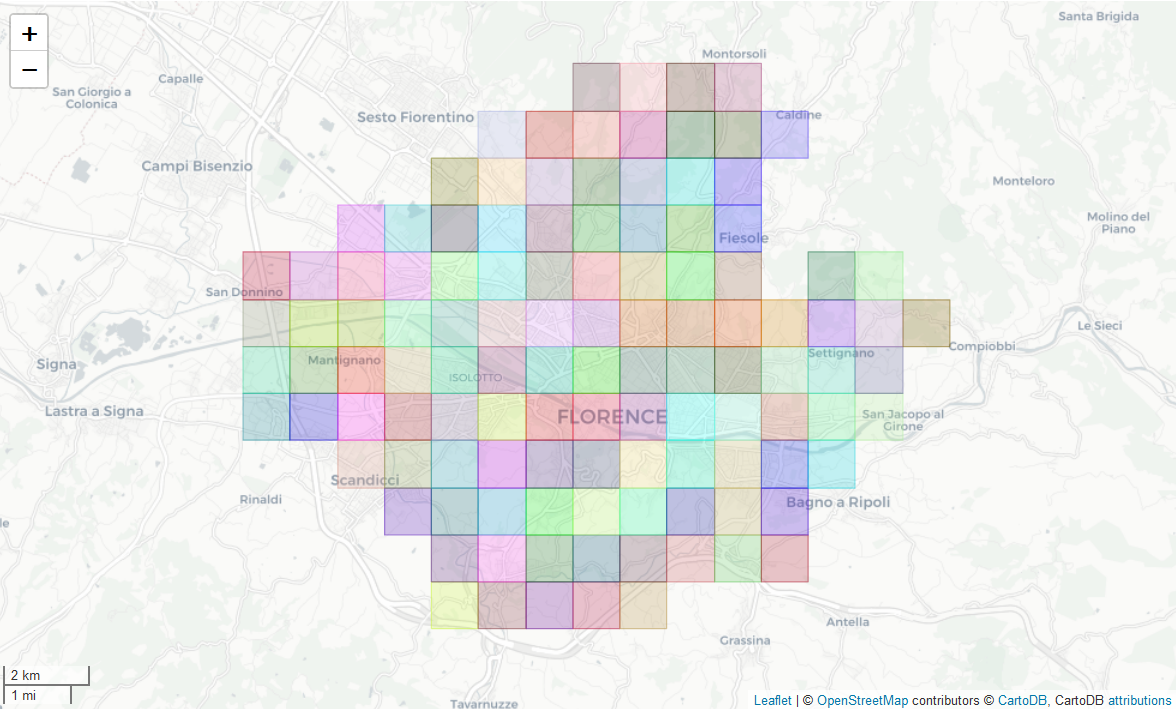

### Flow

In [6]:
#creating a function to generate a uniform random flow between each pair of tiles

def uniform_flow(tess):
    #creating a list to put the data in
    flow_data = list()

    for cell_Orig in tess['tile_ID']: #first loop for origin
        for cell_Dest in tess['tile_ID']: #second loop for destination
            if cell_Orig != cell_Dest: #if the flow is not internal

                #append a random flow between origin and destination
                flow_data.append([random.randint(0, 1000), cell_Orig, cell_Dest])

    #put the data into a FlowDataFrame
    fdf = skmob.FlowDataFrame(flow_data, 
                              flow=0, origin=1, destination=2, 
                              tessellation=tess, tile_id='tile_ID')
    return fdf

In [7]:
squared_fdf = uniform_flow(tess_squared)
print(f'Number of Edges: {len(squared_fdf)}')
squared_fdf.head()

Number of Edges: 13340


flow origin destination
0   642      0           1
1   183      0           2
2    36      0           3
3   401      0           4
4   896      0           5

In [8]:
#checking the type of the dataframe if a proper TrajDF or pandas DF
print(type(squared_fdf))

<class 'skmob.core.flowdataframe.FlowDataFrame'>


In [9]:
#too many edges to properly visualize the flows
squared_flow_map = squared_fdf.plot_flows(map_f = squared_map, flow_exp=2, flow_weight=0.1, zoom=13)

In [ ]:
squared_flow_map

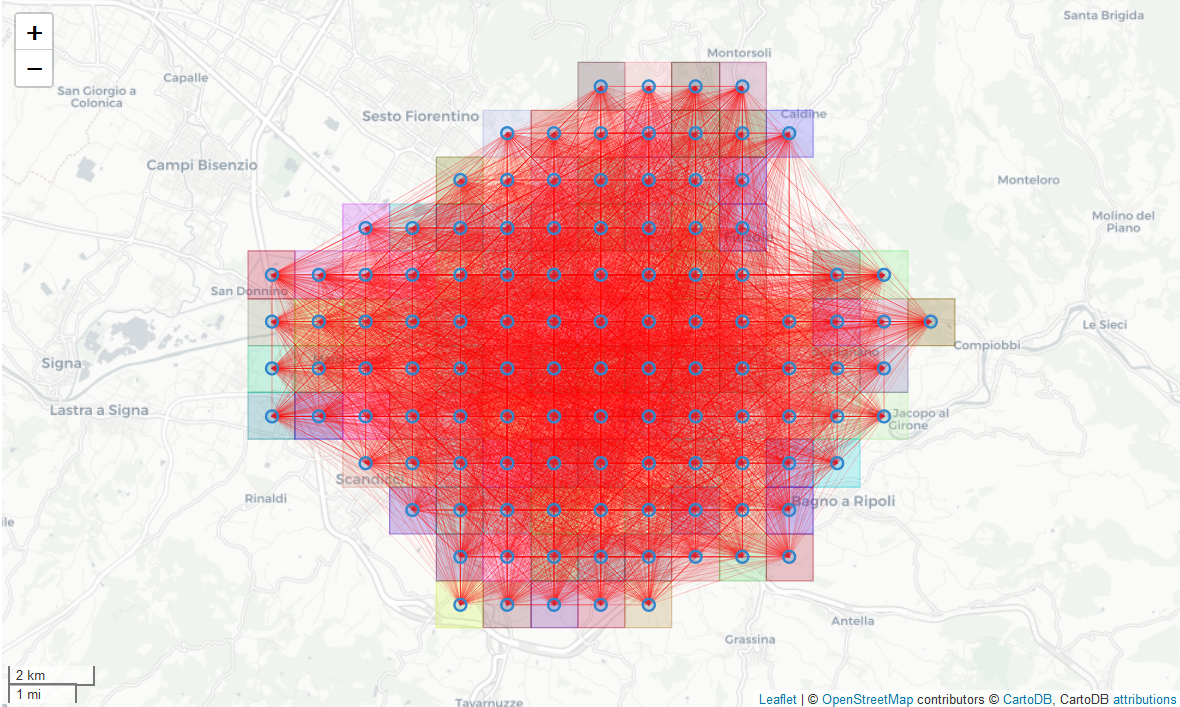

## H3 Tessellation

### Tessellate

In [11]:
tess_h3 = tiler.get('h3_tessellation', base_shape='Florence, Italy', meters=optimal_meters)
print(f"tiles = {len(tess_h3)}")
tess_h3.head()

tiles = 21


C:\Users\Ludovico\anaconda3\envs\Geo\lib\site-packages\skmob\tessellation\tilers.py:243: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  base_shape = gpd.GeoSeries(cascaded_union(polygons), crs=base_shape.crs)


geometry            H3_INDEX  \
0  POLYGON ((11.27551 43.75977, 11.27660 43.74706...  608524850750816255   
1  POLYGON ((11.17879 43.79061, 11.17990 43.77791...  608524854475358207   
2  POLYGON ((11.22385 43.81331, 11.22495 43.80061...  608524848183902207   
3  POLYGON ((11.27223 43.79789, 11.27332 43.78518...  608524848133570559   
4  POLYGON ((11.16488 43.77034, 11.16599 43.75763...  608524850599821311   

  tile_ID  
0       0  
1       1  
2       2  
3       3  
4       4

In [12]:
print(type(tess_h3))
#saving to a shapely file (shapely is default)
tess_h3.to_file('squared.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
h3_map = plot_gdf(tess_h3, zoom=12)
h3_map

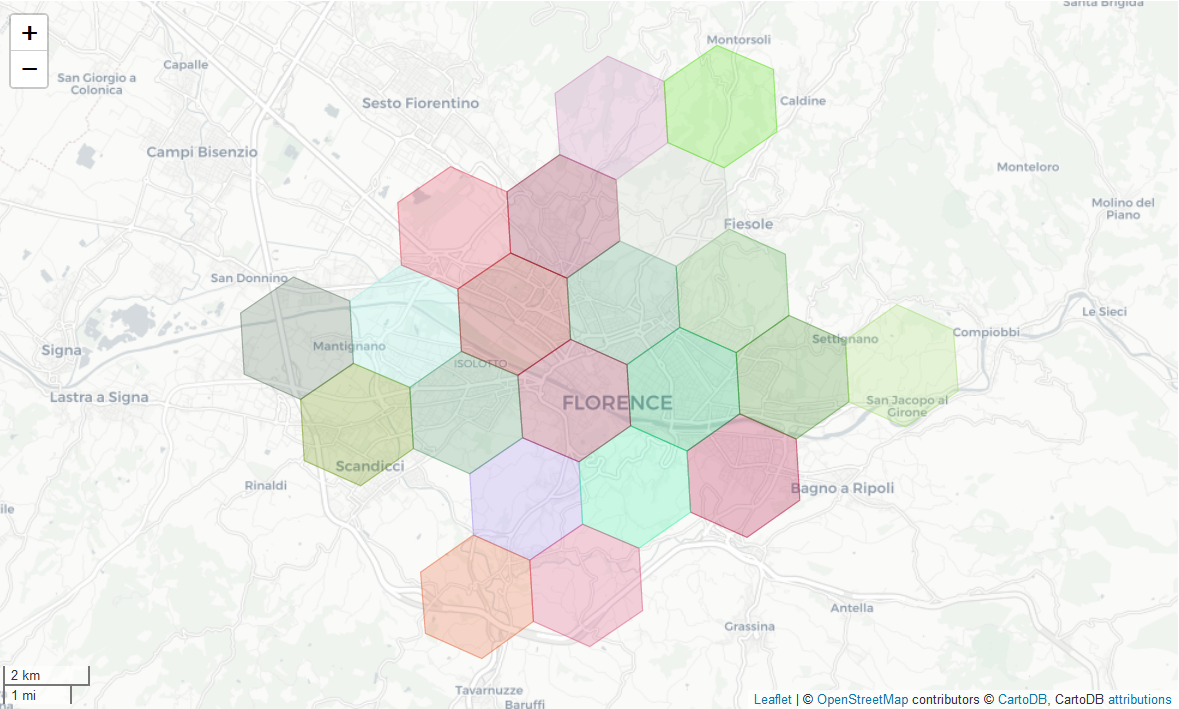

### Flow

In [14]:
h3_fdf = uniform_flow(tess_h3)
print(f'Number of Edges: {len(h3_fdf)}')
h3_fdf.head()

Number of Edges: 420


flow origin destination
0   244      0           1
1   979      0           2
2   955      0           3
3   987      0           4
4   721      0           5

In [15]:
#checking the type of the dataframe if a proper TrajDF or pandas DF
print(type(h3_fdf))

<class 'skmob.core.flowdataframe.FlowDataFrame'>


In [16]:
#too many edges to properly visualize the flows
h3_flow_map = h3_fdf.plot_flows(map_f = h3_map, flow_exp=2, flow_weight=0.1, zoom=12)

In [ ]:
h3_flow_map

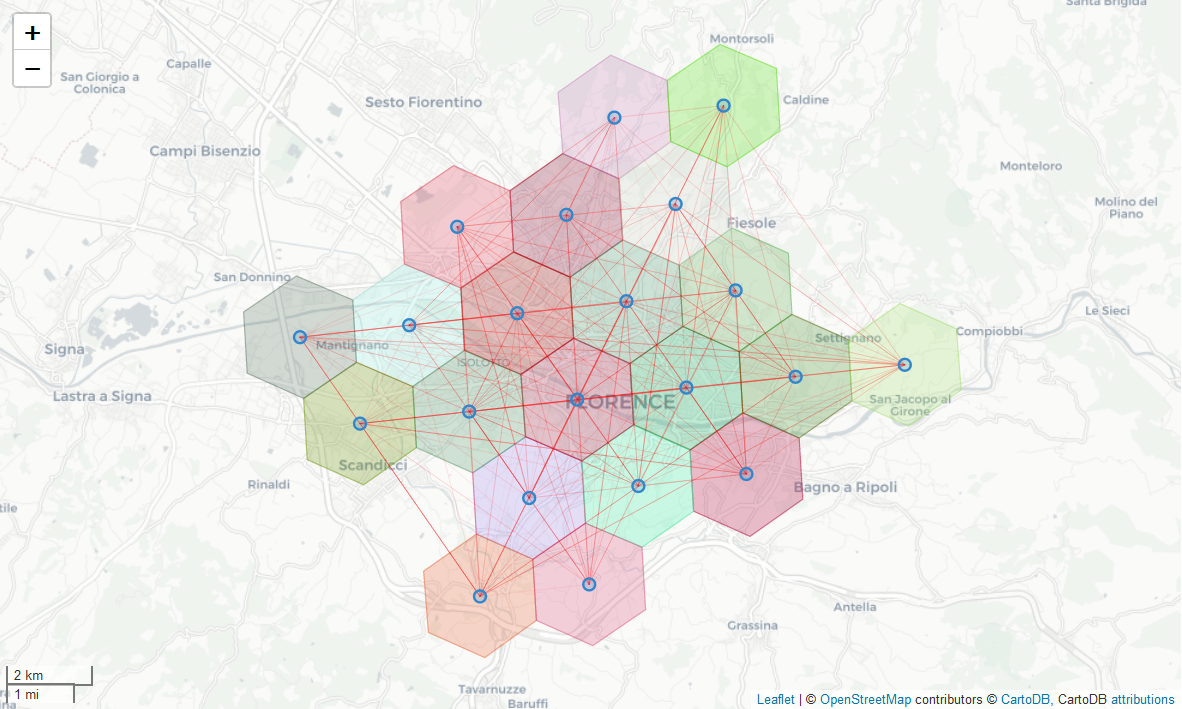

## Voronoi Tessellation

In [18]:
############## Series of Functions to plot a Voronoi Tessellation ##############
#get the convex hull from the squared tessellation to create the border of the space
def get_convex_hull(tess):
    polygon = tess.at[0, 'geometry']
    for tile in tess['geometry']:
        polygon = polygon.union(tile)
    return polygon.convex_hull

#generating random points inside the borders
def polygon_random_points(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append([random_point.x, random_point.y])
    return np.array(points)

#creating the GeoDataFrame with the geometry of the tessellation
def to_GeoDataFrame(region_polys):
    tile_id=[]
    for i in range(len(region_polys)):
        tile_id.append(i)
    gdf = gpd.GeoDataFrame(columns=['tile_ID','geometry'], crs={'init': 'epsg:4326'})
    gdf['tile_ID'] = tile_id
    for index, row in gdf.iterrows():
        gdf.at[index, 'geometry'] = region_polys[index]
    return gdf

#main to create a voronoi tessellation
def get_voronoi_tessellation(poly_ch, points):
    vor = Voronoi(points, qhull_options='Qbb Qc Qx')
    region_polys, region_pts = voronoi_regions_from_coords(points, poly_ch)
    tess_voronoi = to_GeoDataFrame(region_polys)
    return tess_voronoi

### Tessellate

In [19]:
#tessellation of Florence
florence = get_convex_hull(tess_squared)
#setting 100 points inside the bounds of Florence
points = polygon_random_points(florence, 100)

#Voronoi tessellation of Florence
tess_voronoi = get_voronoi_tessellation(florence, points)
tess_voronoi.head()

C:\Users\Ludovico\anaconda3\envs\Geo\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


tile_ID                                           geometry
0        0  POLYGON ((11.16286 43.79336, 11.14976 43.79088...
1        1  POLYGON ((11.31973 43.74861, 11.31687 43.76058...
2        2  POLYGON ((11.29814 43.82883, 11.29732 43.81648...
3        3  POLYGON ((11.29234 43.77614, 11.28512 43.75623...
4        4  POLYGON ((11.14976 43.77575, 11.14976 43.79088...

In [20]:
print(type(tess_voronoi))
#saving to a shapely file (shapely is default)
tess_voronoi.to_file('squared.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
voronoi_map = plot_gdf(tess_voronoi, zoom=12)
voronoi_map

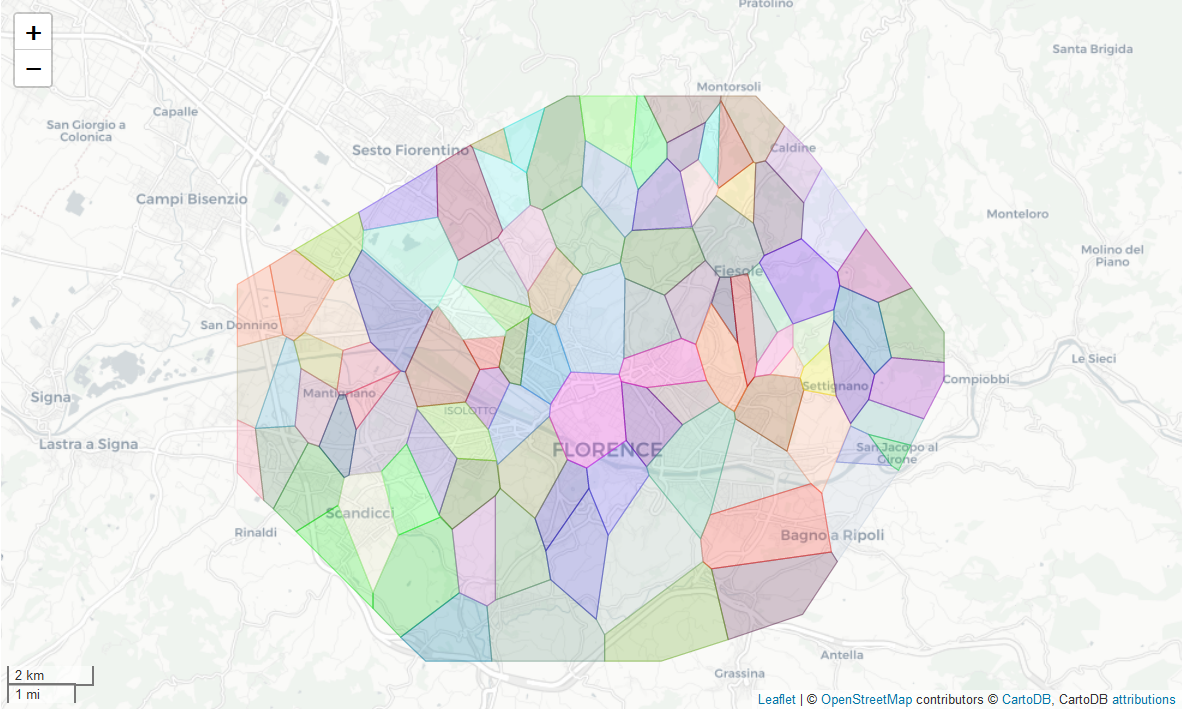

### Flow

In [22]:
voronoi_fdf = uniform_flow(tess_voronoi)
print(f'Number of Edges: {len(voronoi_fdf)}')
voronoi_fdf.head()

Number of Edges: 9900


flow origin destination
0   300      0           1
1   439      0           2
2   178      0           3
3   749      0           4
4   946      0           5

In [23]:
#checking the type of the dataframe if a proper TrajDF or pandas DF
print(type(voronoi_fdf))

<class 'skmob.core.flowdataframe.FlowDataFrame'>


In [24]:
#too many edges to properly visualize the flows
voronoi_flow_map = voronoi_fdf.plot_flows(map_f = voronoi_map, flow_exp=2, flow_weight=0.1, zoom=12)

In [ ]:
voronoi_flow_map

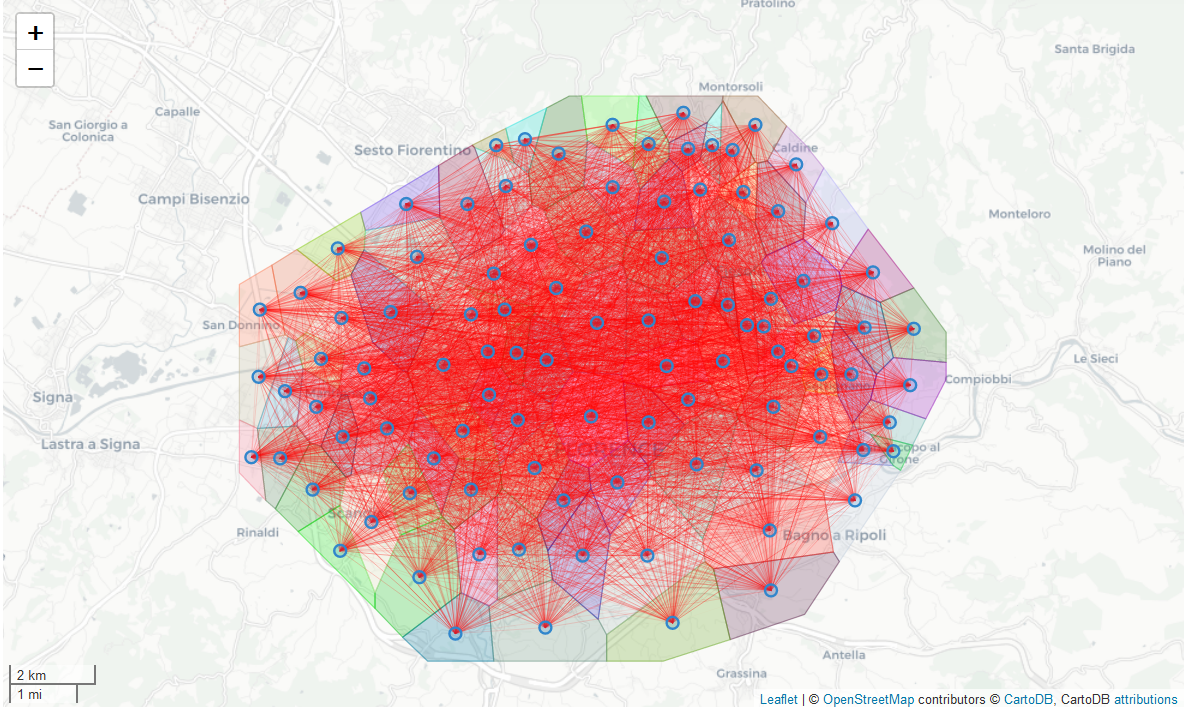